In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\sonali\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [2]:
train_df=pd.read_csv('train.csv', nrows=200000)

In [3]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
test_df=pd.read_csv("test.csv")

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


 Fare Amount is the target variable and factors like key and passenger_Count may not  be affecting the target variable


In [6]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
train_df=train_df.dropna(axis=0)

In [8]:
train_df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

C:\Users\sonali\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

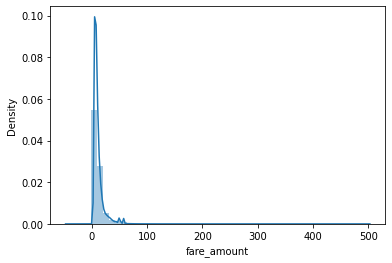

In [9]:
import seaborn as sns
sns.distplot(train_df['fare_amount'])

In [10]:
train_df["pickup_datetime"]=pd.to_datetime(train_df['pickup_datetime'])

In [11]:
print("drop_off latitude min value",test_df["dropoff_latitude"].min())
print("drop_off latitude max value",test_df["dropoff_latitude"].max())
print("drop_off longitude min value", test_df["dropoff_longitude"].min())
print("drop_off longitude max value",test_df["dropoff_longitude"].max())
print("pickup latitude min value",test_df["pickup_latitude"].min())
print("pickup latitude max value",test_df["pickup_latitude"].max())
print("pickup longitude min value",test_df["pickup_longitude"].min())
print("pickup longitude max value",test_df["pickup_longitude"].max())

drop_off latitude min value 40.568973
drop_off latitude max value 41.696683
drop_off longitude min value -74.263242
drop_off longitude max value -72.990963
pickup latitude min value 40.573143
pickup latitude max value 41.709555
pickup longitude min value -74.252193
pickup longitude max value -72.986532


In [12]:
min_longitude=-74.263242,
min_latitude=40.573143,
max_longitude=-72.986532, 
max_latitude=41.709555

In [13]:
tempdf=train_df[(train_df["dropoff_latitude"]<min_latitude) | (train_df["pickup_latitude"]<min_latitude) | (train_df["dropoff_longitude"]<min_longitude) | (train_df["pickup_longitude"]<min_longitude) | (train_df["dropoff_latitude"]>max_latitude) | (train_df["pickup_latitude"]>max_latitude) | (train_df["dropoff_longitude"]>max_longitude) | (train_df["pickup_longitude"]>max_longitude) ]
print("before droping",train_df.shape)
train_df.drop(tempdf.index,inplace=True)
print("after droping",train_df.shape)

before droping (199999, 8)
after droping (195771, 8)


In [14]:
print("before droping", train_df.shape)
train_df=train_df[train_df['fare_amount']>0]
print("after droping", train_df.shape)

before droping (195771, 8)
after droping (195755, 8)


In [15]:
import calendar
train_df['day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['weekday']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['year']=train_df['pickup_datetime'].apply(lambda x:x.year)

In [16]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [17]:
train_df.weekday = train_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195755 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                195755 non-null  object             
 1   fare_amount        195755 non-null  float64            
 2   pickup_datetime    195755 non-null  datetime64[ns, UTC]
 3   pickup_longitude   195755 non-null  float64            
 4   pickup_latitude    195755 non-null  float64            
 5   dropoff_longitude  195755 non-null  float64            
 6   dropoff_latitude   195755 non-null  float64            
 7   passenger_count    195755 non-null  int64              
 8   day                195755 non-null  int64              
 9   hour               195755 non-null  int64              
 10  weekday            195755 non-null  int64              
 11  month              195755 non-null  int64              
 12  year               195755 non-

In [19]:
train_df=train_df[train_df['passenger_count']<=8]

In [20]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
count,195755.000000,195755.000000,195755.000000,195755.000000,195755.000000,195755.000000,195755.000000,195755.000000,195755.000000,195755.000000,195755.000000
mean,11.320219,-73.975074,40.751199,-73.973996,40.751548,1.682588,15.680325,13.518796,3.124482,6.273495,2011.738535
std,9.713889,0.038671,0.029805,0.037954,0.032911,1.306664,8.673003,6.501948,1.987312,3.445653,1.864641
min,0.010000,-74.248263,40.576302,-74.241953,40.573200,0.000000,1.000000,0.000000,0.000000,1.000000,2009.000000
25%,6.000000,-73.992255,40.736660,-73.991470,40.735675,1.000000,8.000000,9.000000,1.000000,3.000000,2010.000000
50%,8.500000,-73.982043,40.753537,-73.980500,40.753959,1.000000,16.000000,14.000000,3.000000,6.000000,2012.000000
75%,12.500000,-73.968306,40.767550,-73.965179,40.768381,2.000000,23.000000,19.000000,5.000000,9.000000,2013.000000
max,500.000000,-73.085745,41.650000,-73.085764,41.543217,6.000000,31.000000,23.000000,6.000000,12.000000,2015.000000


In [21]:
y=train_df['fare_amount']

In [22]:
X=train_df.drop(['key','pickup_datetime','fare_amount'],axis=1)

In [23]:
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size =0.25, random_state =21)

In [25]:
X_-train.head()

NameError: name 'X_' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #instantiating the estimator object 
lin_reg.fit(X_train,y_train)

In [ ]:
print(lin_reg.intercept_)

In [ ]:
print(lin_reg.coef_)

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
import pandas as pd
pd.DataFrame(y_pred, y_test)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print("The root mean suqared error value of my model is :", RMSE)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [ ]:
rfrmodel.fit(X_train,y_train)
rfrmodel_pred= rfrmodel.predict(X_test)

In [ ]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

In [ ]:
test_df["pickup_datetime"]=pd.to_datetime(test_df['pickup_datetime'])

In [ ]:
import calendar
test_df['day']=test_df['pickup_datetime'].apply(lambda x:x.day)
test_df['hour']=test_df['pickup_datetime'].apply(lambda x:x.hour)
test_df['weekday']=test_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
test_df['month']=test_df['pickup_datetime'].apply(lambda x:x.month)
test_df['year']=test_df['pickup_datetime'].apply(lambda x:x.year)

In [ ]:
test_df.weekday = test_df.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [ ]:
test_df=test_df.drop(['key','pickup_datetime'],axis=1)

In [ ]:
rfrmodel_pred= rfrmodel.predict(test_df)

In [ ]:
rfrmodel_pred